In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

In [2]:
data = pd.read_csv('Merged_Data.csv', index_col = 0)

In [3]:
data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,patientType,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DaysAdmitted,NumDiagnoses,NumProcedures,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,1068.0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,7,9,0,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,1068.0,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,3,3,1,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,1068.0,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inpatient,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,4,6,0,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,1068.0,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,inpatient,1914-03-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,9,9,1,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,1068.0,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,inpatient,1938-04-01,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,18,9,1,0


In [4]:
display(data.describe())
display(data.info())

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DaysAdmitted,NumDiagnoses,NumProcedures,PotentialFraud
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,1.578838,1.255011,25.446969,378.588195,11.931472,11.93877,1.598132,1.409573,1.587998,1.848615,1.687070,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745,2.727940,3.010897,0.053557,0.381211
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.493746,0.717437,15.192784,265.215531,0.889712,0.78590,0.490276,0.491755,0.492196,0.358424,0.463687,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,4.904984,2.448213,0.280534,0.485685
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,1.000000,1.000000,11.000000,150.000000,12.000000,12.00000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000,1.000000,1.000000,0.000000,0.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000,1.000000,24.000000,350.000000,12.000000,12.00000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000,1.000000,2.000000,0.000000,0.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,2.000000,1.000000,38.000000,570.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000,1.000000,4.000000,0.000000,1.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000,5.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,37.000000,10.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   DeductibleAmtPaid                557312 non-null  float64
 8   ClmDiagnosisCode_1               547758 non-null  object 
 9   ClmDiagnosisCode_2               362605 non-null  object 
 10  ClmDiagnosisCode_3               243055 non-null  object 
 11  ClmDiagnosisCode_4               164536 non-null  object 
 12  Cl

None

In [5]:
sns.set_style('whitegrid')

<AxesSubplot:title={'center':'Distribution of Fraud in Dataset'}, xlabel='PotentialFraud', ylabel='count'>

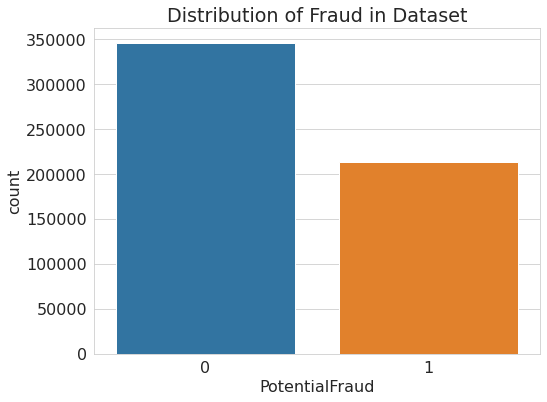

In [22]:
plt.figure(figsize = (8,6))
plt.title('Distribution of Fraud in Dataset')
sns.countplot(x = 'PotentialFraud', data = data)

<AxesSubplot:title={'center':'Distribution of Fraud by patientType'}, xlabel='PotentialFraud', ylabel='count'>

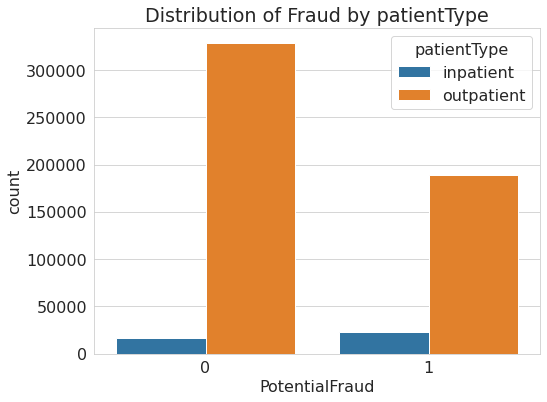

In [23]:
# data['PotentialFraud'].plot(kind = 'bar', by = data['patientType'], figsize = (12,4))
plt.figure(figsize = (8,6))
plt.title('Distribution of Fraud by patientType')
sns.countplot(x = 'PotentialFraud', hue = 'patientType', data = data)

Text(0, 0.5, 'Percent of claims dataset that is Fraudulent')

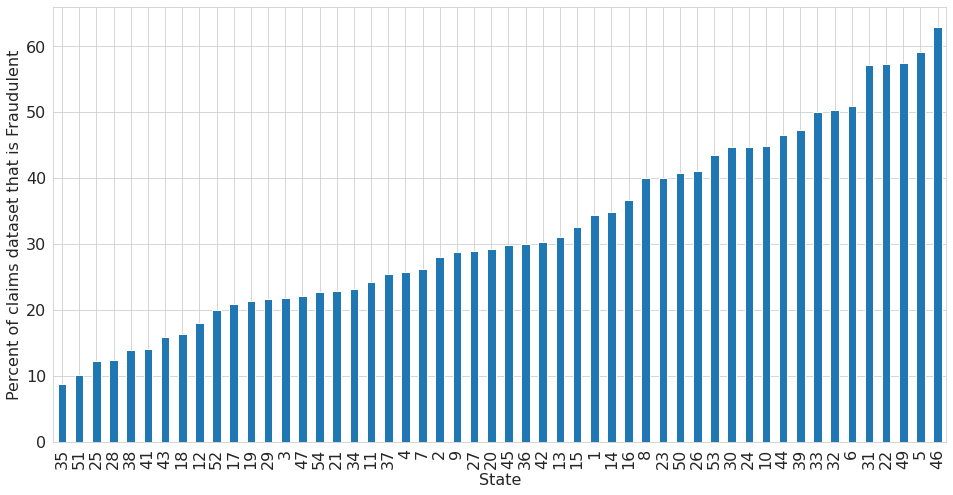

In [61]:
plt.figure(figsize = (16, 8))
state_fraud_rates = data.groupby('State')['PotentialFraud'].value_counts(normalize = True)[:, 1]
(state_fraud_rates.sort_values() * 100).plot(kind = 'bar')
plt.ylabel('Percent of claims dataset that is Fraudulent')

The likelihood of fraud will depend very much on the state the claim was filed in. Let's see if the number of claims by state is similar to this distribution.

Text(0.5, 0, 'State')

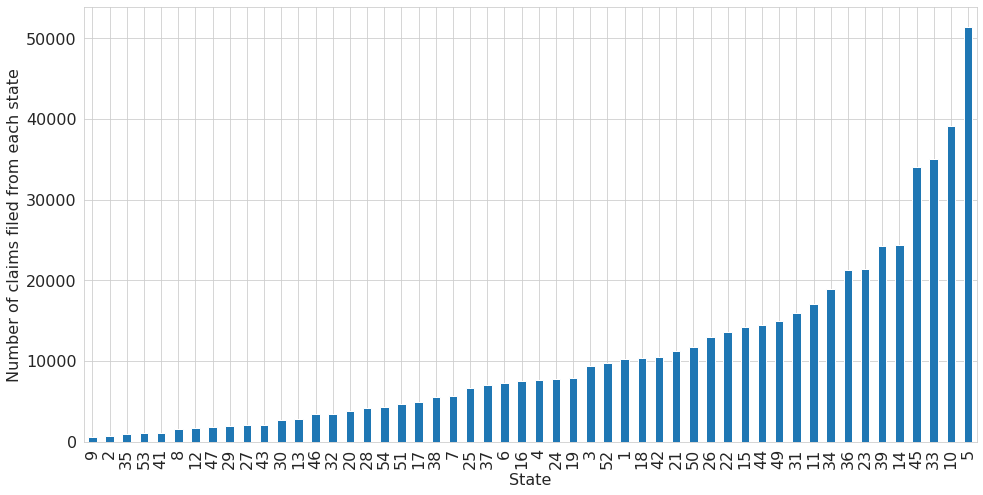

In [65]:
plt.figure(figsize = (16, 8))
data['State'].value_counts(ascending = True).plot(kind = 'bar')
plt.ylabel('Number of claims filed from each state')
plt.xlabel('State')

In [81]:
top_10_state_count = data['State'].value_counts()[:10]
top_10_state_rate = state_fraud_rates.sort_values(ascending = False)[:10]
top_10_state_count = top_10_state_count.index.values
top_10_state_rate = top_10_state_rate.index.values
print('States in top 10 for both fraud rate and overall number of fraudulent claims:')
for i in top_10_state_count:
    if i in top_10_state_rate:
        print(i)

States in top 10 for both fraud rate and overall number of fraudulent claims:
5
33
39


Text(0.5, 1.0, 'Number of Insurance Claims by Amount Reimbursed')

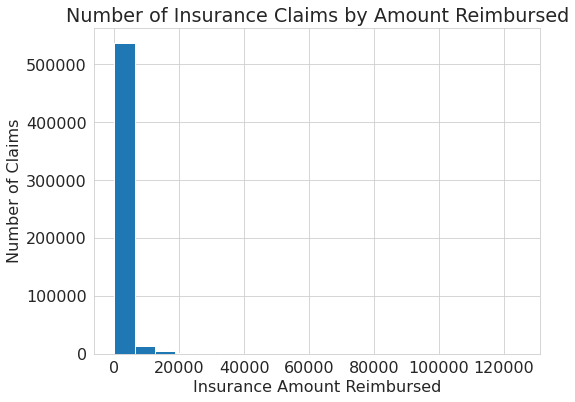

In [24]:
plt.figure(figsize = (8,6))
plt.hist(data['InscClaimAmtReimbursed'], bins = 20)
plt.xlabel('Insurance Amount Reimbursed')
plt.ylabel('Number of Claims')
plt.title('Number of Insurance Claims by Amount Reimbursed')

Looks like amount reimbursed is highly skewed to the right, let's zoom in on 0-20000 where most of the data is.

Text(0.5, 1.0, 'Number of Insurance Claims by Amount Reimbursed')

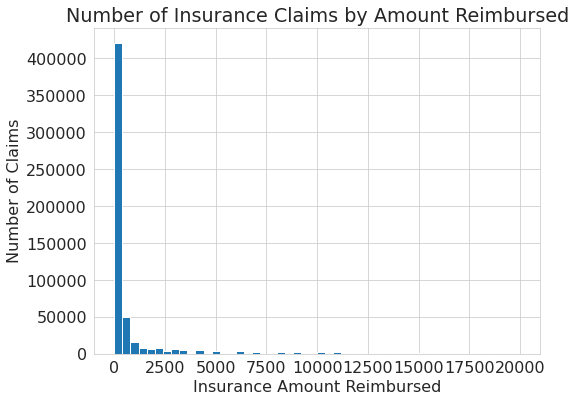

In [25]:
plt.figure(figsize = (8,6))
plt.hist(data['InscClaimAmtReimbursed'], bins = 50, range = (0, 20000))
plt.xlabel('Insurance Amount Reimbursed')
plt.ylabel('Number of Claims')
plt.title('Number of Insurance Claims by Amount Reimbursed')

Vast majority of claims reimbursed are for less than $500

Text(0.5, 1.0, 'Histogram of Deductible Amount Paid')

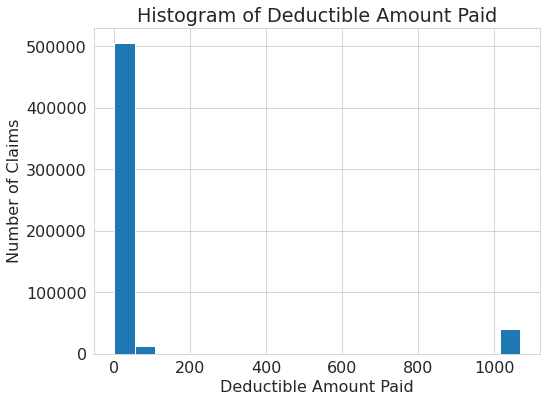

In [26]:
plt.figure(figsize = (8,6))
plt.hist(data['DeductibleAmtPaid'], bins = 20)
plt.xlabel('Deductible Amount Paid')
plt.ylabel('Number of Claims')
plt.title('Histogram of Deductible Amount Paid')

Text(0.5, 1.0, 'Distribution of inpatient stay duration')

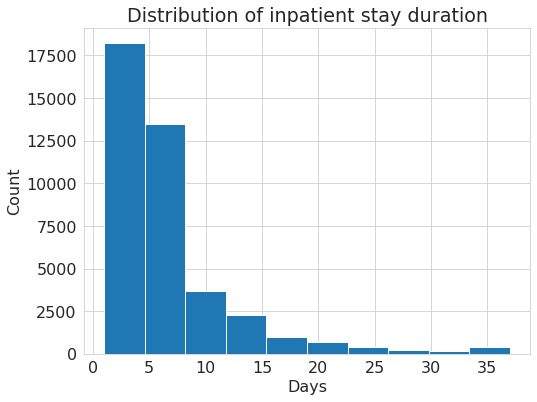

In [27]:
inpt = data[data['patientType'] == 'inpatient']
plt.figure(figsize = (8,6))
plt.hist(inpt['DaysAdmitted'])
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Distribution of inpatient stay duration')

In [89]:
cor = data.drop(['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis =1).corr()

<AxesSubplot:>

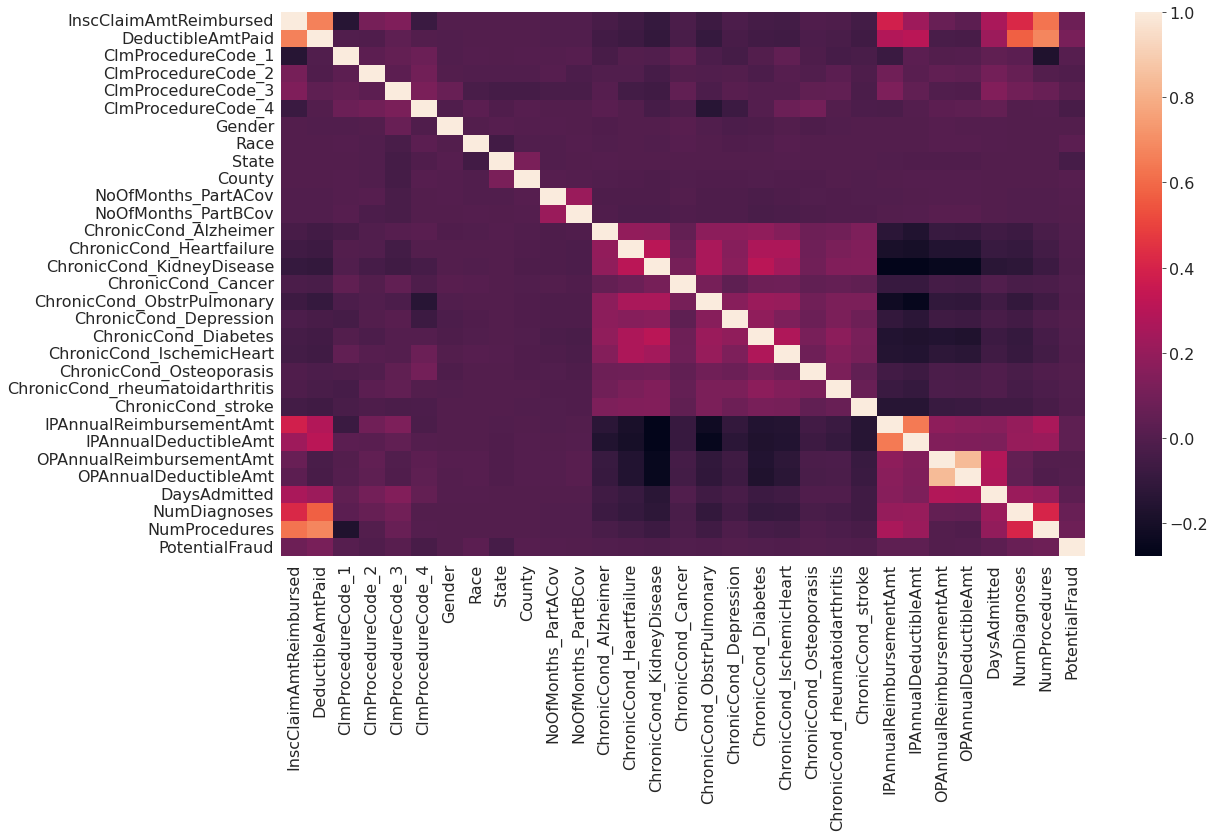

In [91]:
plt.figure(figsize = (18,10))
sns.heatmap(cor)

Most of the data isn't very correlated except for a select few that make sense. These include NumDiagnoses and NumProcedures, DeductibleAmtPaid and InscClaimAmtReimbursed, and that chronic conditions increase your risk of having another chronic condition.

In [94]:
cor[abs(cor) > 0.4]

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DaysAdmitted,NumDiagnoses,NumProcedures,PotentialFraud
InscClaimAmtReimbursed,1.000000,0.665488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.418096,0.626210,NaN
DeductibleAmtPaid,0.665488,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574991,0.677076,NaN
ClmProcedureCode_1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClmProcedureCode_4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reimbursement and deductible amounts are also highly correlated.

In [98]:
cor[abs(cor) > 2]['PotentialFraud']

InscClaimAmtReimbursed            NaN
DeductibleAmtPaid                 NaN
ClmProcedureCode_1                NaN
ClmProcedureCode_2                NaN
ClmProcedureCode_3                NaN
ClmProcedureCode_4                NaN
Gender                            NaN
Race                              NaN
State                             NaN
County                            NaN
NoOfMonths_PartACov               NaN
NoOfMonths_PartBCov               NaN
ChronicCond_Alzheimer             NaN
ChronicCond_Heartfailure          NaN
ChronicCond_KidneyDisease         NaN
ChronicCond_Cancer                NaN
ChronicCond_ObstrPulmonary        NaN
ChronicCond_Depression            NaN
ChronicCond_Diabetes              NaN
ChronicCond_IschemicHeart         NaN
ChronicCond_Osteoporasis          NaN
ChronicCond_rheumatoidarthritis   NaN
ChronicCond_stroke                NaN
IPAnnualReimbursementAmt          NaN
IPAnnualDeductibleAmt             NaN
OPAnnualReimbursementAmt          NaN
OPAnnualDedu

None of our features are highly correlated with our target of 'PotentialFraud'.

Text(0.5, 1.0, 'Distribution of patient race')

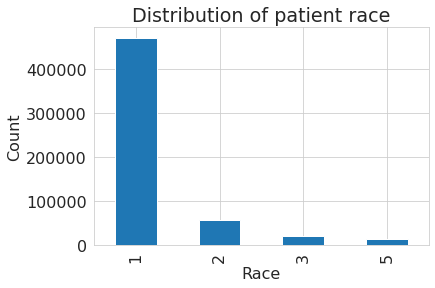

In [119]:
race_counts = data['Race'].value_counts(ascending = False)
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of patient race')

Text(0, 0.5, 'Percent of claims for patient\n race that are fraudulent')

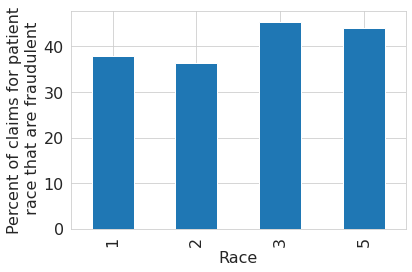

In [122]:
(data.groupby('PotentialFraud')['Race'].value_counts()[1] * 100 / race_counts).plot(kind = 'bar')
plt.xlabel('Race')
plt.ylabel('Percent of claims for patient\n race that are fraudulent')

While the vast majority of patients are in race group 1, physicians seem to file claims at roughly equal rates for patients of all four represented races.